# Introduction

This notebook explores a how to implement Locality Sensitive Hashing in a simple fashion using random projections.

In [1]:
import numpy as np
import pandas as pd
import random
import torch
from torch import nn, optim
import torch.nn.functional as F
import math
import matplotlib.pyplot as plt
import gensim
import gensim.downloader as downloader

# Prepare data

In [26]:
corpus = downloader.load('glove-wiki-gigaword-100')
data = dict(zip(corpus.index_to_key, torch.tensor(corpus.vectors)))
words = list(data.keys())
d = corpus.vector_size

# Results

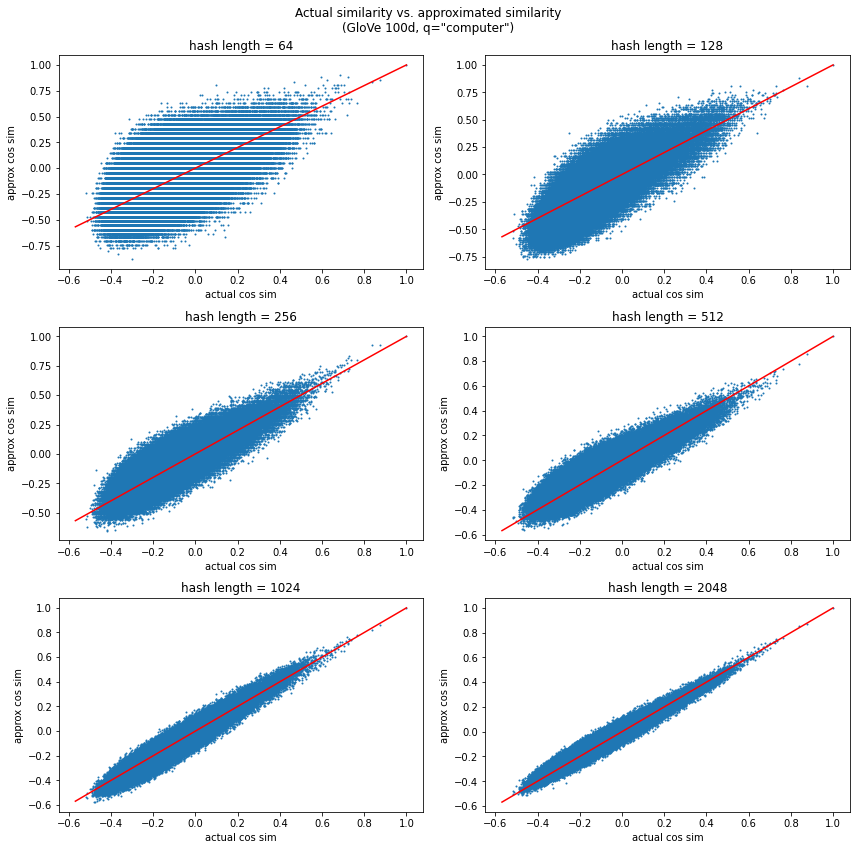

In [29]:
plt.figure(figsize=(12,12))
bins = [64,128,256,512,1024,2048]
for i,r in enumerate(bins):
    R = torch.rand(r, d)-0.5
    #R = torch.rand(r,d)
    #R = F.normalize(R, dim=1)
    D = torch.stack(list(data.values()))
    D = F.normalize(D, dim=1)

    V = torch.sign(D @ R.T).clamp(0,1)
    H = dict(zip(data.keys(),V))

    q = 'computer'
    q_idx = words.index(q)
    diff = torch.norm(V - H[q], dim=1, p=0)

    approx_distances = torch.cos(torch.pi * (diff/r))
    actual_distances = (D @ D[q_idx].unsqueeze(1)).squeeze()
    plt.subplot(math.ceil(len(bins)/2), 2, i+1)
    plt.title('hash length = %d' % r)
    plt.scatter(actual_distances, approx_distances, s=1)
    plt.xlabel('actual cos sim')
    plt.ylabel('approx cos sim')
    min_sim = actual_distances.min().item()*1.1
    plt.plot([min_sim, 1], [min_sim, 1], color='red')
plt.suptitle('Actual similarity vs. approximated similarity\n(GloVe 100d, q="%s")' % q)
plt.tight_layout()
plt.show()